Dataset Maladies Cardiaques (UCI Heart Disease):
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    1.

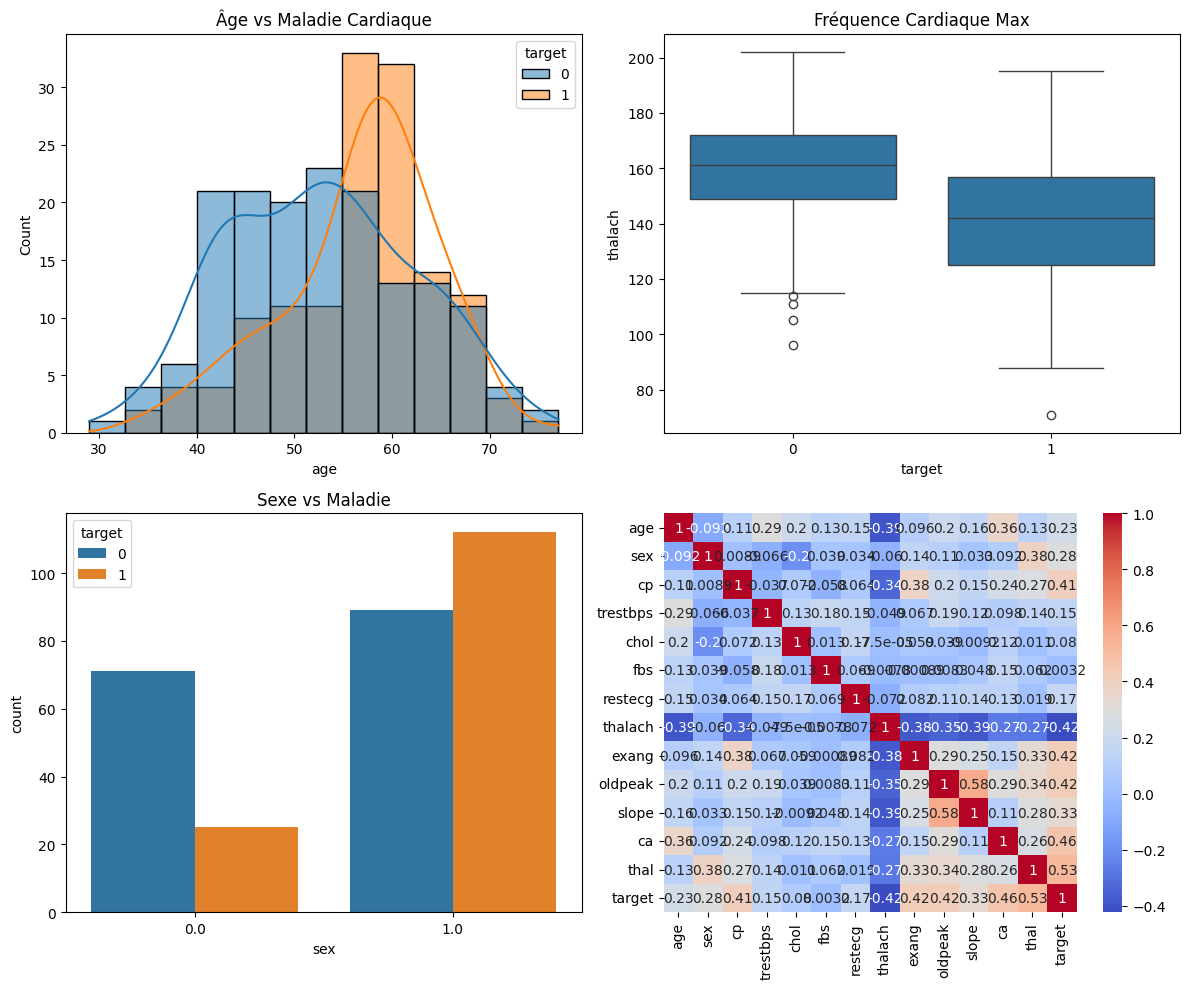

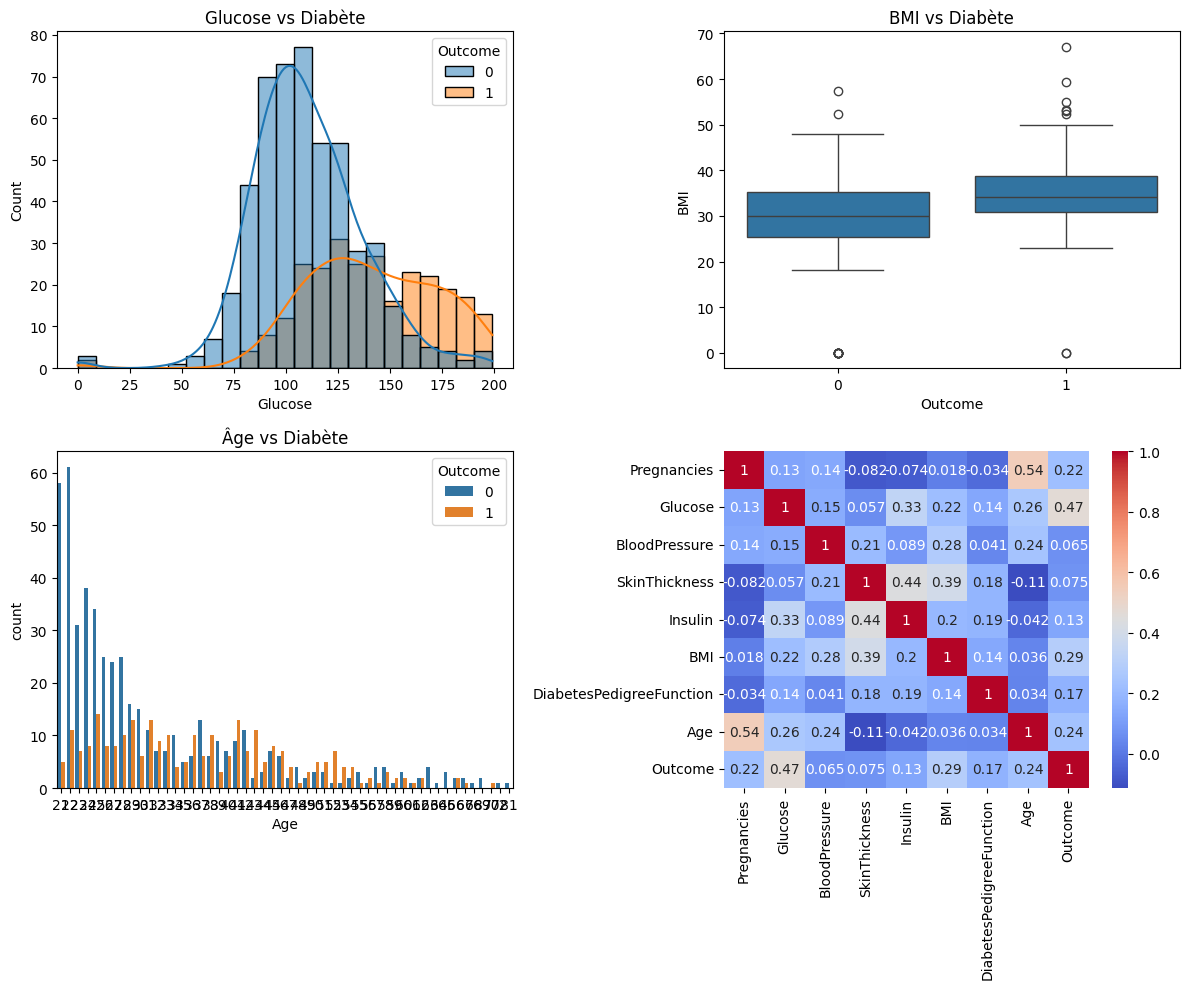


Rapport Classification Maladies Cardiaques:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



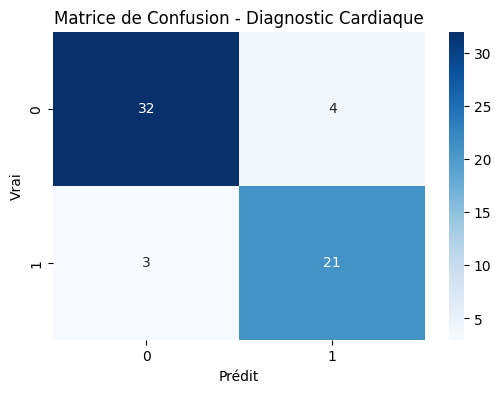


Épidémiologie Cardiaque:
Prévalence maladie: 46.1%
Âge moyen maladie: 56.8 ans
Âge moyen sain: 52.6 ans

Épidémiologie Diabète:
Prévalence diabète: 34.9%
BMI moyen diabète: 35.1
Glucose moyen diabète: 141.3


In [6]:
# Téléchargement des datasets UCI populaires pour diagnostic assisté (maladies cardiaques et diabète)
# Ces datasets sont standards en épidémiologie et ML pour la santé publique [web:11][web:12]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Dataset Heart Disease UCI (Cleveland) - 303 patients, 14 features [web:11]
url_heart = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
columns_heart = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_df = pd.read_csv(url_heart, names=columns_heart, na_values='?')
heart_df = heart_df.dropna()  # Nettoyage des valeurs manquantes
heart_df['target'] = (heart_df['target'] > 0).astype(int)  # Binarisation: 0=sain, 1=maladie

print("Dataset Maladies Cardiaques (UCI Heart Disease):")
print(heart_df.describe())
print("\nRépartition cible:", heart_df['target'].value_counts().to_dict())

# Dataset Diabète Pima Indians - 768 femmes, 8 features + outcome [web:12]
url_diabetes = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns_diabetes = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes_df = pd.read_csv(url_diabetes, names=columns_diabetes)
print("\nDataset Diabète (Pima Indians):")
print(diabetes_df.describe())
print("\nRépartition Outcome:", diabetes_df['Outcome'].value_counts().to_dict())

# Graphes pour Heart Disease
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(data=heart_df, x='age', hue='target', ax=axes[0,0], kde=True).set_title('Âge vs Maladie Cardiaque')
sns.boxplot(data=heart_df, x='target', y='thalach', ax=axes[0,1]).set_title('Fréquence Cardiaque Max')
sns.countplot(data=heart_df, x='sex', hue='target', ax=axes[1,0]).set_title('Sexe vs Maladie')
sns.heatmap(heart_df.corr(), annot=True, cmap='coolwarm', ax=axes[1,1])
plt.tight_layout()
plt.show()

# Graphes pour Diabète
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(data=diabetes_df, x='Glucose', hue='Outcome', ax=axes[0,0], kde=True).set_title('Glucose vs Diabète')
sns.boxplot(data=diabetes_df, x='Outcome', y='BMI', ax=axes[0,1]).set_title('BMI vs Diabète')
sns.countplot(data=diabetes_df, x='Age', hue='Outcome', ax=axes[1,0]).set_title('Âge vs Diabète')
sns.heatmap(diabetes_df.corr(), annot=True, cmap='coolwarm', ax=axes[1,1])
plt.tight_layout()
plt.show()

# Exemple Analyse Simple: Régression Logistique sur Heart Disease
X_heart = heart_df.drop('target', axis=1)
y_heart = heart_df['target']
X_train, X_test, y_train, y_test = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nRapport Classification Maladies Cardiaques:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion - Diagnostic Cardiaque')
plt.ylabel('Vrai')
plt.xlabel('Prédit')
plt.show()

# Analyse Épidémiologique Basique
print("\nÉpidémiologie Cardiaque:")
print(f"Prévalence maladie: {heart_df['target'].mean()*100:.1f}%")
print(f"Âge moyen maladie: {heart_df[heart_df['target']==1]['age'].mean():.1f} ans")
print(f"Âge moyen sain: {heart_df[heart_df['target']==0]['age'].mean():.1f} ans")

print("\nÉpidémiologie Diabète:")
print(f"Prévalence diabète: {diabetes_df['Outcome'].mean()*100:.1f}%")
print(f"BMI moyen diabète: {diabetes_df[diabetes_df['Outcome']==1]['BMI'].mean():.1f}")
print(f"Glucose moyen diabète: {diabetes_df[diabetes_df['Outcome']==1]['Glucose'].mean():.1f}")
